In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

In [3]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
# 혹시 코랩환경을 사용하신다면 왼쪽 폴더모양 아이콘을 눌러 "train_data.csv"를 드래그&드롭으로 업로드한 후 사용해주세요
DATA_PATH = '/opt/ml/input/data/train_data.csv'
train_df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
train_df = train_df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 3.97 s, sys: 352 ms, total: 4.32 s
Wall time: 4.33 s


In [4]:
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userID            int16         
 1   assessmentItemID  object        
 2   testId            object        
 3   answerCode        int8          
 4   Timestamp         datetime64[ns]
 5   KnowledgeTag      int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 62.7+ MB


In [6]:
test_df = pd.read_csv('/opt/ml/input/data/test_data.csv', dtype=dtype, parse_dates=['Timestamp'])
test_df = test_df[test_df['answerCode'] != -1]
test_df = test_df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

test_df.answerCode.unique()

array([1, 0], dtype=int8)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259370 entries, 0 to 259369
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userID            259370 non-null  int16         
 1   assessmentItemID  259370 non-null  object        
 2   testId            259370 non-null  object        
 3   answerCode        259370 non-null  int8          
 4   Timestamp         259370 non-null  datetime64[ns]
 5   KnowledgeTag      259370 non-null  int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 7.2+ MB


In [8]:
df = pd.concat([train_df, test_df])

In [9]:
df


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525956 entries, 0 to 259369
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userID            int16         
 1   assessmentItemID  object        
 2   testId            object        
 3   answerCode        int8          
 4   Timestamp         datetime64[ns]
 5   KnowledgeTag      int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 89.1+ MB


## userID

In [11]:
df.userID.nunique()

7442

In [12]:
# 유저별 푼 문항수, 정답률

user_groupby = df.groupby('userID').agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
})

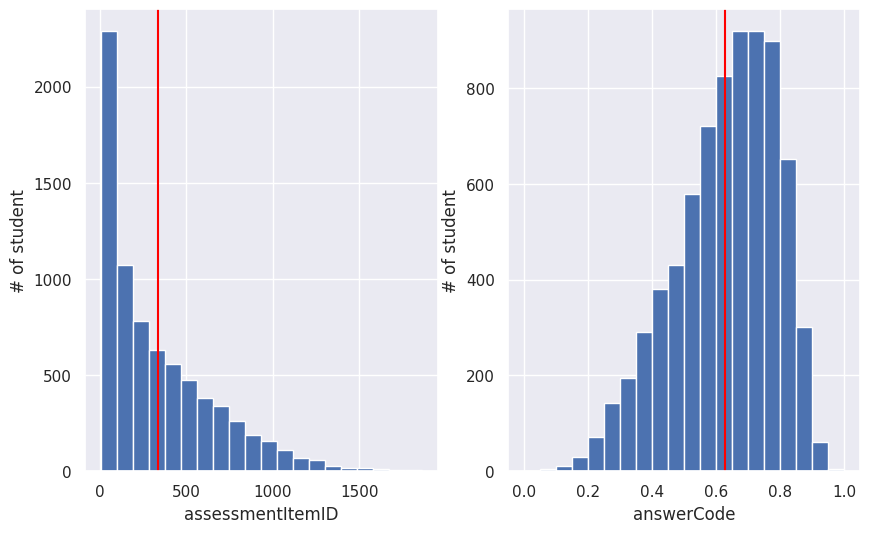

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax, column in zip(axs, user_groupby.columns):
    user_groupby[column].hist(bins=20, ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('# of student')
    ax.axvline(user_groupby[column].mean(), color='red')

In [14]:
df.KnowledgeTag.nunique()

912

In [15]:
# 유저별 푼 태그 분포도 및 정답률
# 한 유저가 많이 푼 태그이거나 정답률이 높은 태그를 가진 문제에 대해서는 정답률이 높지 않을까? 
# 유저의 feature로 사용할 수 있지 않을까?
# 하지만 정답률이 높은 경우 한 문제만 푼 경우도 있을 수 있어서 조심해야 할듯
# 별 상관관계가 없는듯..

user_tag_groupby = df.groupby(['userID', 'KnowledgeTag']).agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
})

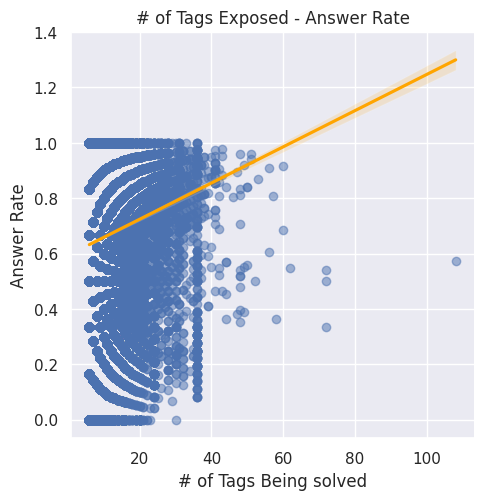

In [16]:
g = sns.lmplot(
    data=user_tag_groupby[user_tag_groupby['assessmentItemID'] > 5],
    x='assessmentItemID',
    y='answerCode',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of Tags Being solved')
g.set_ylabels('Answer Rate')
ax = plt.gca()

ax.set_title('# of Tags Exposed - Answer Rate');

In [17]:
user_tag_groupby[user_tag_groupby['assessmentItemID'] > 5].corr()['assessmentItemID']['answerCode']

0.08757437872985208

In [18]:
user_tag_groupby = df.groupby(['userID', 'KnowledgeTag']).agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
})

user_groupby = df.groupby('userID').agg({'answerCode':'mean'})
user_groupby.rename(columns={'answerCode': 'answer_rate'}, inplace=True)

user_tag_groupby = user_tag_groupby.merge(user_groupby, on='userID')

user_tag_groupby = user_tag_groupby.reset_index().sort_values(['userID', 'assessmentItemID'], ascending=False)
user_tag_groupby

,userID,assessmentItemID,answerCode,answer_rate
492305,7441,5,0.200000,0.555556
492306,7441,4,1.000000,0.555556
492299,7440,5,0.200000,0.400000
492302,7440,4,0.500000,0.400000
492300,7440,3,0.666667,0.400000
...,...,...,...,...
130,0,1,1.000000,0.630872
137,0,1,0.000000,0.630872
157,0,1,1.000000,0.630872
159,0,1,0.000000,0.630872


In [19]:
users = df.userID.unique()
idx = []

for user in users:
    idx.append(user_tag_groupby[user_tag_groupby['userID'] == user].index[0])

In [20]:
df_copy = user_tag_groupby.iloc[idx]
df_copy

,userID,assessmentItemID,answerCode,answer_rate
492203,7419,5,0.800000,0.294118
492128,7401,1,0.000000,0.842105
491983,7373,4,0.500000,0.714286
491605,7298,1,1.000000,0.440000
491491,7277,5,0.800000,0.800000
...,...,...,...,...
218,1,3,1.000000,0.853162
104,0,15,0.266667,0.630872
91,0,6,0.500000,0.630872
141,0,6,0.666667,0.630872


In [21]:
df_copy['deviation'] = df_copy['answerCode'] - df_copy['answer_rate']
df_copy

/tmp/ipykernel_22090/4260504560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['deviation'] = df_copy['answerCode'] - df_copy['answer_rate']


,userID,assessmentItemID,answerCode,answer_rate,deviation
492203,7419,5,0.800000,0.294118,0.505882
492128,7401,1,0.000000,0.842105,-0.842105
491983,7373,4,0.500000,0.714286,-0.214286
491605,7298,1,1.000000,0.440000,0.560000
491491,7277,5,0.800000,0.800000,0.000000
...,...,...,...,...,...
218,1,3,1.000000,0.853162,0.146838
104,0,15,0.266667,0.630872,-0.364206
91,0,6,0.500000,0.630872,-0.130872
141,0,6,0.666667,0.630872,0.035794


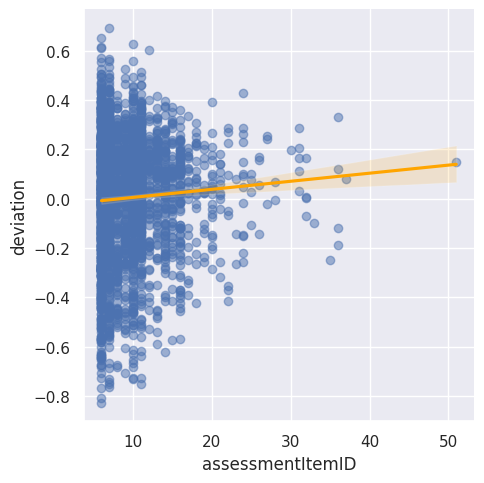

In [22]:
g = sns.lmplot(
    data=df_copy[df_copy['assessmentItemID'] > 5],
    x='assessmentItemID',
    y='deviation',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)

In [23]:
df_copy[df_copy['assessmentItemID'] > 5].corr()['assessmentItemID']['answerCode']

0.09722603585160242

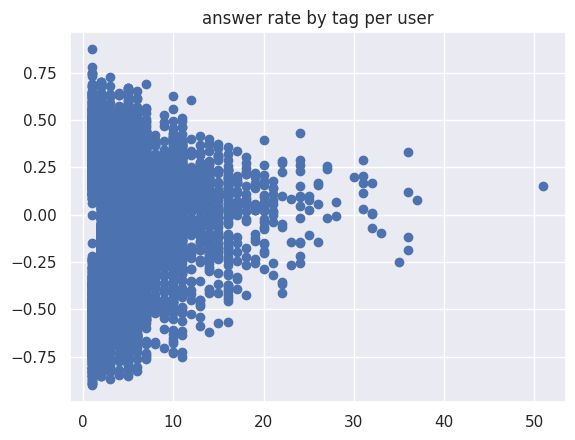

In [24]:
fig, ax = plt.subplots()

ax.set_title("answer rate by tag per user")
ax.scatter(df_copy["assessmentItemID"], df_copy["deviation"])

In [25]:
# 날짜
df['date'] = df['Timestamp'].dt.date

# 시간대
df['hour'] = df['Timestamp'].dt.hour

df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0
...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23


In [26]:
hour_groupby = df.groupby(['hour']).agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
}).reset_index()

hour_groupby['hour'] = hour_groupby['hour'].apply(lambda x: x+9)

In [27]:
hour_groupby['hour'] = hour_groupby['hour'].apply(lambda x: x-24 if x >= 24 else x)

In [28]:
hour_groupby = hour_groupby.sort_values('hour')

hour_groupby

,hour,assessmentItemID,answerCode
15,0,14182,0.664927
16,1,12306,0.578580
17,2,13834,0.545251
18,3,17136,0.541725
19,4,23732,0.532277
20,5,29483,0.535902
21,6,38750,0.586116
22,7,66195,0.643583
23,8,90089,0.659126
0,9,112534,0.650799


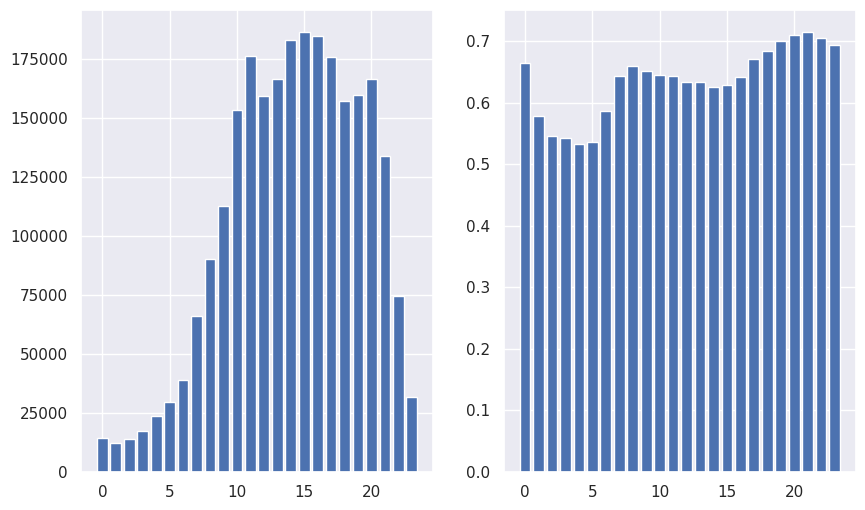

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax, column in zip(axs, hour_groupby.columns[1:]):
    ax.bar(hour_groupby['hour'], hour_groupby[column]) 


## assessmentItemID

In [30]:
# 문항별 정답률, 

item_groupby = df.groupby('assessmentItemID').agg({
    'userID' : 'count',
    'answerCode': 'mean'
})

## testId

In [31]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0
...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23


In [32]:
df['difficulty'] = df['testId'].apply(lambda x: x[1:4])

In [33]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060
...,...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040


In [34]:
user_difficulty_groupby = df.groupby(['userID', 'difficulty']).agg({'answerCode': 'mean', 'assessmentItemID': 'count'})

In [35]:
user_difficulty_groupby

answerCode  assessmentItemID
userID difficulty                              
0      020           0.722222                36
       060           0.791908               346
       080           0.468320               363
1      040           0.822719               581
       090           0.903409               352
...                       ...               ...
7439   040           0.733333                15
7440   030           0.400000                10
       050           0.400000                 5
7441   030           0.200000                 5
       040           1.000000                 4

[19739 rows x 2 columns]

In [36]:
user_difficulty_groupby = user_difficulty_groupby.reset_index().sort_values(['userID', 'difficulty'])

In [37]:
user_difficulty_groupby.head(20)

,userID,difficulty,answerCode,assessmentItemID
0,0,020,0.722222,36
1,0,060,0.791908,346
2,0,080,0.468320,363
3,1,040,0.822719,581
4,1,090,0.903409,352
5,2,030,0.876404,178
6,2,050,0.132653,98
7,3,020,0.879310,174
8,3,050,0.655052,861
9,4,010,0.868217,129


In [39]:
user_groupby = df.groupby('userID').agg({'answerCode':'mean'})
user_groupby.rename(columns={'answerCode': 'answer_rate'}, inplace=True)

user_difficulty_groupby = user_difficulty_groupby.merge(user_groupby, on='userID')

In [40]:
user_difficulty_groupby

,userID,difficulty,answerCode,assessmentItemID,answer_rate
0,0,020,0.722222,36,0.630872
1,0,060,0.791908,346,0.630872
2,0,080,0.468320,363,0.630872
3,1,040,0.822719,581,0.853162
4,1,090,0.903409,352,0.853162
...,...,...,...,...,...
19734,7439,040,0.733333,15,0.733333
19735,7440,030,0.400000,10,0.400000
19736,7440,050,0.400000,5,0.400000
19737,7441,030,0.200000,5,0.555556


,userID,difficulty,answerCode,assessmentItemID,answer_rate
6525,2436,010,0.836735,147,0.780000
6777,2529,010,0.705645,248,0.618421
17872,6724,010,0.600000,10,0.333333
12112,4543,010,0.842520,127,0.821192
4813,1796,010,0.993377,151,0.842697
...,...,...,...,...,...
3726,1396,090,0.820163,367,0.698159
13157,4940,090,0.466667,30,0.666667
18271,6875,090,0.300000,30,0.518519
3802,1423,090,0.208955,201,0.662568


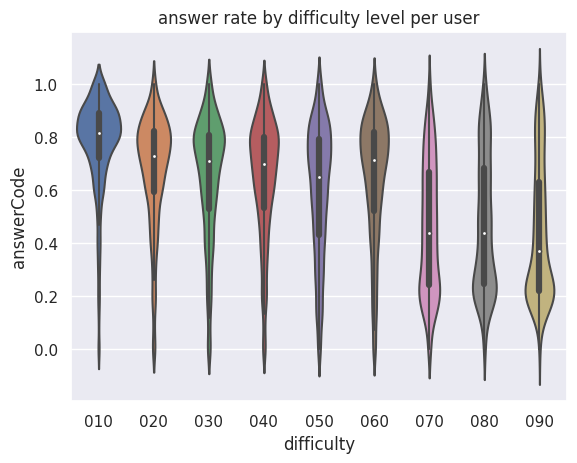

In [41]:
# 유저별 해당 난이도의 정답률 분포

fig, ax = plt.subplots()

ax.set_title("answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answerCode", data=user_difficulty_groupby.sort_values('difficulty'))

user_difficulty_groupby.sort_values('difficulty')

In [42]:
# 060에 비해서 050이 아래 위로 더 넓은 분포
# 060에 비해서 050을 푼 학생들의 평균 정답률이 더 낮지 않을까?

In [43]:
dfficulty_groupby = user_difficulty_groupby.groupby('difficulty').agg({'answer_rate':'mean', 'assessmentItemID':'sum', 'userID':'count'})

In [44]:
dfficulty_groupby
# 해당 난이도를 푼 유저의 평균 정답률은 별로 차이나지 않는다는 것을 알 수 있다.
# 오히려 높은 레벨의 문제를 푼 유저들의 평균 정답률이 낮다는 것을 알 수 있다.

,answer_rate,assessmentItemID,userID
difficulty,,,
010,0.674811,303675,2301
020,0.647538,297263,2481
030,0.635753,303365,2724
040,0.633961,300403,2974
050,0.622848,306317,2577
060,0.636667,296284,2364
070,0.580769,315177,1882
080,0.584488,271841,1693
090,0.569256,131631,743


<Axes: title={'center': 'total answer rate by difficulty level per user'}, xlabel='difficulty', ylabel='answer_rate'>

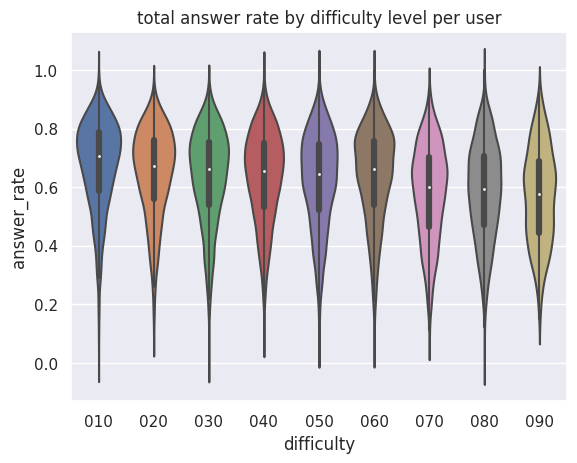

In [45]:
# 해당 난이도의 문제를 푼 유저들의 평균 정답률 분포
fig, ax = plt.subplots()

ax.set_title("total answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answer_rate", data=user_difficulty_groupby.sort_values('difficulty'))

# 050에 비해서 060을 푼 유저들의 평균 정답률이 약간 높다는 것을 알 수 있다.

In [46]:
user_groupby.describe()

,answer_rate
count,7442.000000
mean,0.628749
std,0.159608
min,0.000000
25%,0.526782
50%,0.651923
75%,0.750728
max,1.000000


In [54]:
# 070, 080이나 090을 푼 상위 25%의 유저들의 difficulty 별 정답률은 높을까?

users = df.userID.unique()
user_df = pd.DataFrame({'userID':[]})

for user in users:
    diff_list = user_difficulty_groupby[user_difficulty_groupby['userID'] == user]['difficulty'].tolist()
    if ('070' in  diff_list or '080' in diff_list or '090' in diff_list) and (user_difficulty_groupby[user_difficulty_groupby['userID'] == user]['answer_rate'].values[0] > 0.75):
        user_df.loc[len(user_df), 'userID'] = user

In [55]:
high_level_users = user_df.merge(user_difficulty_groupby, on='userID').sort_values('difficulty')

<Axes: title={'center': 'total answer rate by difficulty level per user'}, xlabel='difficulty', ylabel='answerCode'>

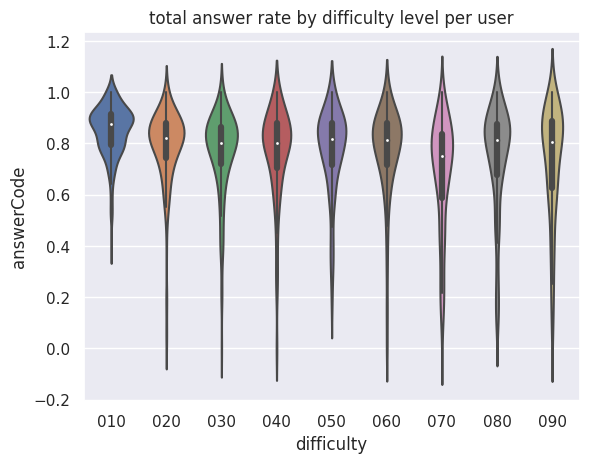

In [56]:
fig, ax = plt.subplots()

ax.set_title("total answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answerCode", data=high_level_users)

# 전체 유저의 분포보다 높게 위치한다는 것을 알 수 있다.

In [50]:
# 분포상으로 봤을 때 070의 난이도가 080이나 090보다 높을 수도 있을 것 같다.
# 난이도라는 feature을 추가하게 되면 category feature로 추가될 것 같은데 
# 050이 060보다 난이도가 높고 낮은게 중요한가? 몇개의 난이도로 나눌 것인지가 중요한 것 아닌가?
# (1) (2, 3, 4, 5, 6) (7, 8, 9) 세 개의 난이도로 나누거나 그냥 그대로 가면 될듯? 